# 26.9 - UMAP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap
import warnings

warnings.filterwarnings('ignore')

In [2]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

Display sample images

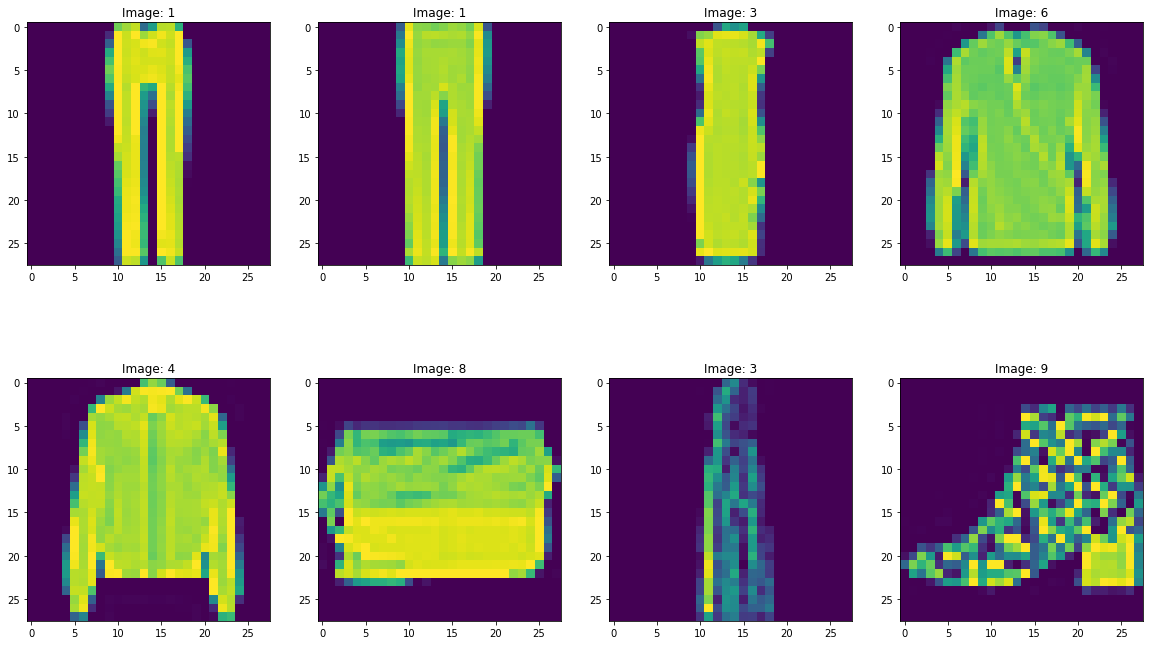

In [3]:
np.random.seed(23)

indices = np.random.choice(70000,10000)
X = mnist.data[indices]
y = mnist.target[indices]

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))
plt.title('Image: {}'.format(y[0]))

plt.subplot(2,4,2)
plt.imshow(X[1].reshape(28,28))
plt.title('Image: {}'.format(y[1]))

plt.subplot(2,4,3)
plt.imshow(X[2].reshape(28,28))
plt.title('Image: {}'.format(y[2]))

plt.subplot(2,4,4)
plt.imshow(X[3].reshape(28,28))
plt.title('Image: {}'.format(y[3]))

plt.subplot(2,4,5)
plt.imshow(X[4].reshape(28,28))
plt.title('Image: {}'.format(y[4]))

plt.subplot(2,4,6)
plt.imshow(X[5].reshape(28,28))
plt.title('Image: {}'.format(y[5]))

plt.subplot(2,4,7)
plt.imshow(X[6].reshape(28,28))
plt.title('Image: {}'.format(y[6]))

plt.subplot(2,4,8)
plt.imshow(X[7].reshape(28,28))
plt.title('Image: {}'.format(y[7]))

plt.show()

Plot two-dimensional t-SNE representation

In [5]:
X.shape

(10000, 784)

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

umap_output = umap.UMAP().fit_transform(X_std)

/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/utils.py", 

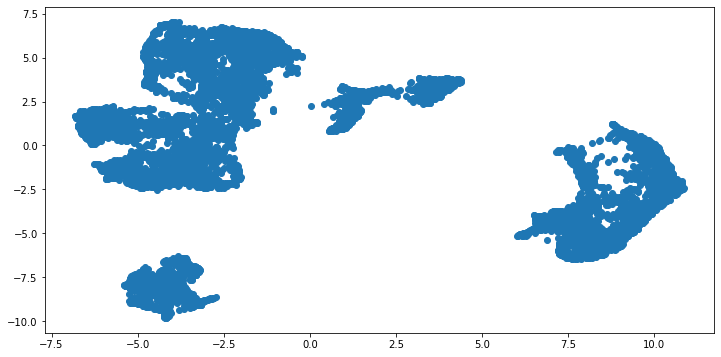

In [9]:
plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output])
plt.show()

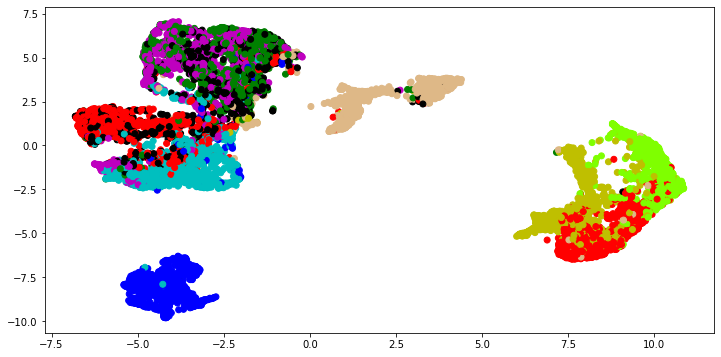

In [10]:
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

There are 4 clusters that are defined very clearly; more so than any solution so far. Two of the clusters are essentially single-class, while the other two include multiple. The images in this dataset are fairly ambiguous for even a human eye to distinguish, so this seems extremely impressive to me.

First I try a couple different values for the n_neighbors parameter. The default is 15

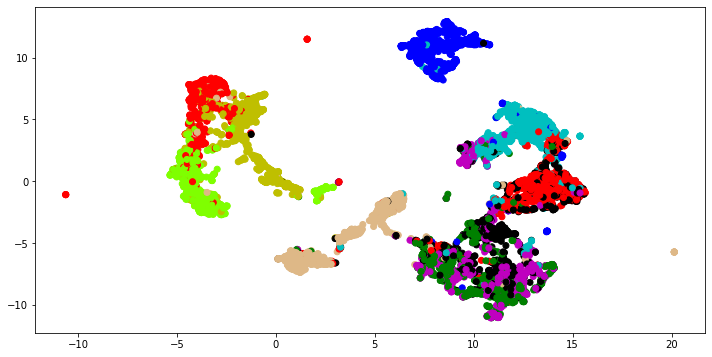

In [15]:
n=5
dist=0.1
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

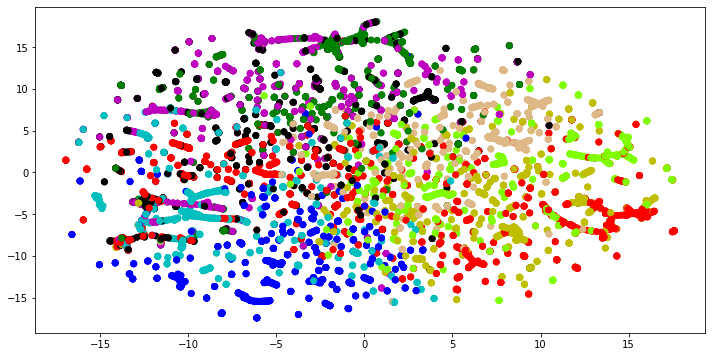

In [16]:
n=2
dist=0.1
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

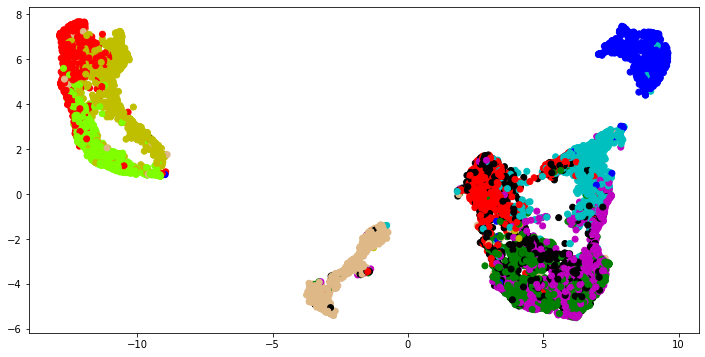

In [17]:
n=50
dist=0.1
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

Now, a couple different values for minimum distance (how tightly the algorithm is allowed to pack points together).

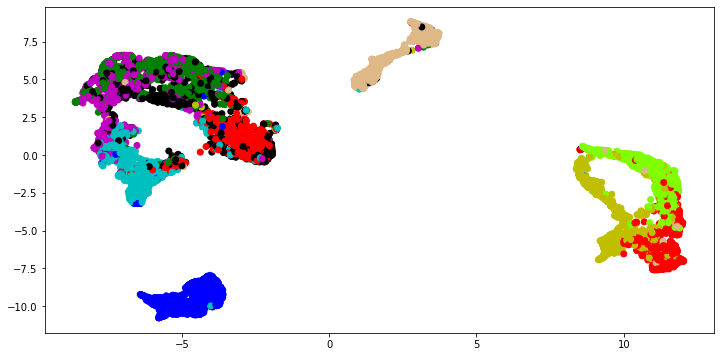

In [19]:
n=15
dist=0.05
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

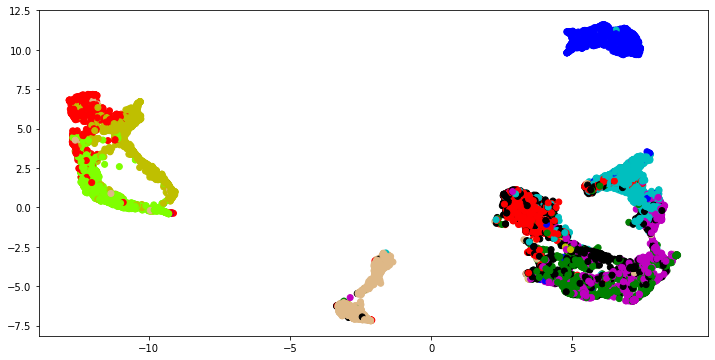

In [22]:
n=15
dist=0.01
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

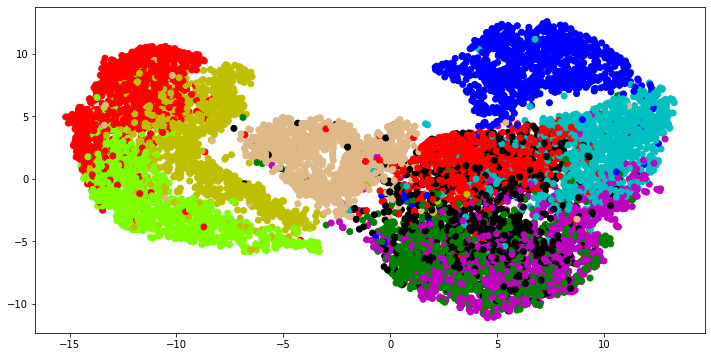

In [23]:
n=15
dist=.99
m='correlation'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

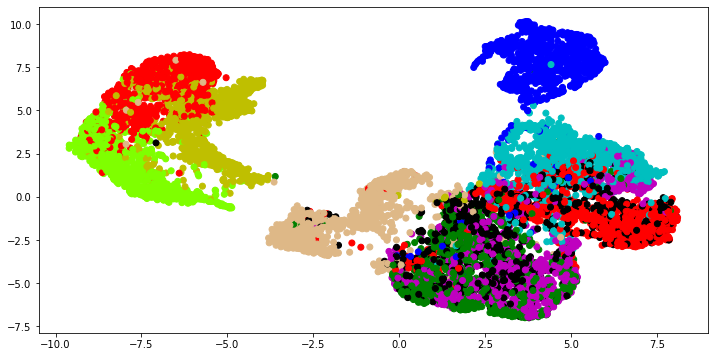

In [24]:
n=15
dist=.3
m='euclidean'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

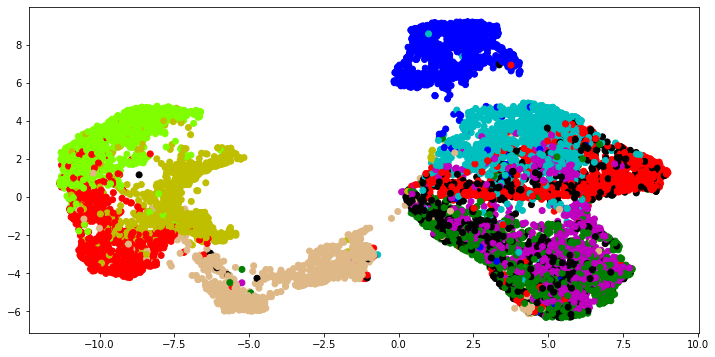

In [25]:
n=15
dist=0.3
m='manhattan'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()

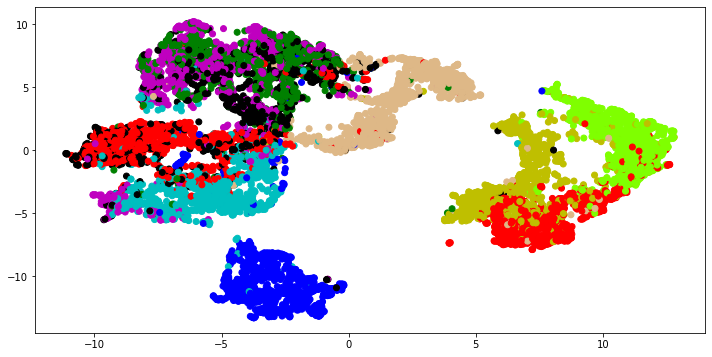

In [26]:
n=5
dist=0.3
m='cosine'

umap_output = umap.UMAP(n_neighbors=n,
                        min_dist=dist,
                        metric=m).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output], c=[colors[int(x)] for x in y])
plt.show()